In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#set of random latitude and longitude combinations
#lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs =zip(lats, lngs)
#lat_lngs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

21.176077904909903 -16.028111899805282
-16.115045436736324 13.30387799501915
-3.257412620785999 -129.56545067976984
4.4078879881847115 148.4564471757149
-65.71086245761816 -161.3303372522667
23.343659779196344 -144.8314291252141
-69.35354611589098 -148.173840077263
7.027761628106234 -16.946474922679016
51.34432137685354 -45.37905417276255
73.7911355256976 -36.0017873929834
37.47192916163705 145.43552834309202
88.73594944182798 50.370674277150215
-19.62652911230535 45.24891973225303
51.656052872665555 41.7226354377859
-66.60473454717282 -18.636706523490346
33.7167814871205 -2.094005766585724
89.26583938508492 141.1437514776818
-62.81219488930738 -22.575587830737618
43.85397690007454 149.9023841322129
-47.97516572694953 -126.90436021516825
76.94257233741644 -97.57188622711837
51.34030413023007 169.1024684553896
-25.129176279023014 18.09072711398312
-76.41982783934169 -4.6291003064292795
84.943632281319 73.63697096269675
-52.89689579303466 -159.310955162649
-49.82604066211855 66.589552585

-20.18976974529116 -9.362400586819206
-57.59177824662158 -114.17830874135797
64.01802414096468 123.9329788066836
-88.69338715216931 -9.153970134020994
-32.46209390946762 171.84451078512774
78.21793594864045 -74.03413390363366
-18.23398787252401 -142.05501141957518
-57.88601896976129 100.4883743226369
81.01356465841181 15.419952938365839
85.35307160781488 -46.860655352758016
-10.77961695772322 -26.589552082896404
-31.0738870034997 -8.625353598176844
35.145699763592916 99.18746554134594
32.77286496652842 -86.47887278622888
-71.77796688652052 68.73909225348353
-20.195177396682055 -52.08536027002347
68.34695811330687 -27.3549933734769
-74.5223769246665 -58.5189244625834
9.268753234794815 49.83401082081707
-7.711771669808854 96.73590179092503
73.5129437441847 99.68534312950578
65.53361741537634 82.25786541303648
-67.25207717027976 75.50897913584726
-63.35685562405338 -129.66805733621217
1.2174328585617076 -91.08196612684549
-72.56094027172597 103.4607562278465
36.52871587607643 -49.95891331

78.13703994855612 -20.7919606562796
18.284126371600337 -83.33281937365332
64.64713848581039 -59.222065713634535
64.9579962541944 133.89042780956402
46.65784387288517 96.9058451236208
50.57840954825264 95.19991318117383
22.00130859094027 148.01636371788442
-80.28503324465402 0.7975219378981251
86.48206405803805 97.26720275648347
16.676695844933306 -27.92303760933612
-62.24449745382383 151.5047466379561
41.40455937540307 112.18773989052426
-50.400079964716035 53.84733280021754
-14.293817624765666 48.57471454682445
59.64904002988416 -83.1619668802876
-24.336730670213257 -136.3645221355777
83.12051360127523 -60.16579801730295
-60.441993989209436 -167.28274482739525
-74.41576255048547 -48.29314647454652
52.20783816010987 59.494169629370845
28.681309638540426 -26.228782666134748
43.23318228460357 -85.71829744624895
2.156078859955386 -65.36474629469208
-76.38902468177123 61.673221561456586
-5.9662042741175725 139.55185956161552
-88.9379408542597 131.56438862797756
-73.27547432432272 -168.5637

In [7]:
from citipy import citipy

In [8]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

599

In [9]:
#import dependencies

from datetime import datetime
import requests
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
Processing Record 2 of Set 1 | lubango
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | lorengau
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | goderich
Processing Record 8 of Set 1 | bonavista
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | kamaishi
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | miandrivazo
Processing Record 13 of Set 1 | ternovka
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | nador
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | mariental

Processing Record 40 of Set 4 | najran
Processing Record 41 of Set 4 | doba
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | oktyabrskoye
Processing Record 44 of Set 4 | codrington
Processing Record 45 of Set 4 | hami
Processing Record 46 of Set 4 | gogrial
Processing Record 47 of Set 4 | darnah
Processing Record 48 of Set 4 | gambiran
Processing Record 49 of Set 4 | victoria
Processing Record 50 of Set 4 | port-gentil
Processing Record 1 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | fulton
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | marsa matruh
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | hammerfest
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | luderitz
Processing Record 12 of Set 5 | liniere
City not foun

Processing Record 30 of Set 8 | santa isabel do rio negro
Processing Record 31 of Set 8 | peleduy
Processing Record 32 of Set 8 | san cristobal
Processing Record 33 of Set 8 | doka
Processing Record 34 of Set 8 | quatre cocos
Processing Record 35 of Set 8 | arlit
Processing Record 36 of Set 8 | nova odesa
Processing Record 37 of Set 8 | boden
Processing Record 38 of Set 8 | rungata
City not found. Skipping...
Processing Record 39 of Set 8 | palmer
Processing Record 40 of Set 8 | shirokiy
Processing Record 41 of Set 8 | teneguiban
City not found. Skipping...
Processing Record 42 of Set 8 | gat
Processing Record 43 of Set 8 | yecla
Processing Record 44 of Set 8 | puerto narino
Processing Record 45 of Set 8 | namtsy
Processing Record 46 of Set 8 | micheweni
Processing Record 47 of Set 8 | teahupoo
Processing Record 48 of Set 8 | obera
Processing Record 49 of Set 8 | tandayag
Processing Record 50 of Set 8 | sao joao da ponte
Processing Record 1 of Set 9 | uwayl
City not found. Skipping...


Processing Record 17 of Set 12 | ixtapa
Processing Record 18 of Set 12 | asau
Processing Record 19 of Set 12 | meiganga
Processing Record 20 of Set 12 | tual
Processing Record 21 of Set 12 | chanute
Processing Record 22 of Set 12 | perg
Processing Record 23 of Set 12 | anori
Processing Record 24 of Set 12 | tuatapere
Processing Record 25 of Set 12 | dzerzhinskoye
Processing Record 26 of Set 12 | lahaina
Processing Record 27 of Set 12 | bajil
Processing Record 28 of Set 12 | srednekolymsk
Processing Record 29 of Set 12 | ewa beach
Processing Record 30 of Set 12 | russell
Processing Record 31 of Set 12 | mandurah
Processing Record 32 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 12 | rapid city
Processing Record 34 of Set 12 | lahij
Processing Record 35 of Set 12 | adiake
Processing Record 36 of Set 12 | havoysund
Processing Record 37 of Set 12 | kapuskasing
Processing Record 38 of Set 12 | axim
Processing Record 39 of Set 12 | verkhovye
Processing Record 

In [11]:
len(city_data)


555

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
#city_data_df = pd.DataFRame(city_data)
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,73.98,56,92,18.75,MR,2022-05-13 16:42:21
1,Lubango,-14.9172,13.4925,82.26,16,40,4.61,AO,2022-05-13 16:42:21
2,Atuona,-9.8000,-139.0333,78.30,66,60,21.30,PF,2022-05-13 16:42:22
3,Lorengau,-2.0226,147.2712,81.01,73,39,8.88,PG,2022-05-13 16:42:11
4,Mataura,-46.1927,168.8643,52.48,96,100,3.65,NZ,2022-05-13 16:42:23
5,Hilo,19.7297,-155.0900,72.63,87,40,8.05,US,2022-05-13 16:42:24
6,Goderich,43.7501,-81.7165,73.72,60,8,12.66,CA,2022-05-13 16:42:24
7,Bonavista,48.6499,-53.1147,41.45,66,50,7.27,CA,2022-05-13 16:42:25
8,Tasiilaq,65.6145,-37.6368,28.56,50,31,1.19,GL,2022-05-13 16:42:26
9,Kamaishi,39.2667,141.8833,58.01,99,100,1.41,JP,2022-05-13 16:42:27


In [13]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2022-05-13 16:42:21,20.9310,-17.0347,73.98,56,92,18.75
1,Lubango,AO,2022-05-13 16:42:21,-14.9172,13.4925,82.26,16,40,4.61
2,Atuona,PF,2022-05-13 16:42:22,-9.8000,-139.0333,78.30,66,60,21.30
3,Lorengau,PG,2022-05-13 16:42:11,-2.0226,147.2712,81.01,73,39,8.88
4,Mataura,NZ,2022-05-13 16:42:23,-46.1927,168.8643,52.48,96,100,3.65
5,Hilo,US,2022-05-13 16:42:24,19.7297,-155.0900,72.63,87,40,8.05
6,Goderich,CA,2022-05-13 16:42:24,43.7501,-81.7165,73.72,60,8,12.66
7,Bonavista,CA,2022-05-13 16:42:25,48.6499,-53.1147,41.45,66,50,7.27
8,Tasiilaq,GL,2022-05-13 16:42:26,65.6145,-37.6368,28.56,50,31,1.19
9,Kamaishi,JP,2022-05-13 16:42:27,39.2667,141.8833,58.01,99,100,1.41


In [14]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from the DataFrame for plotting
#lats = city_data_df["lats"]
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

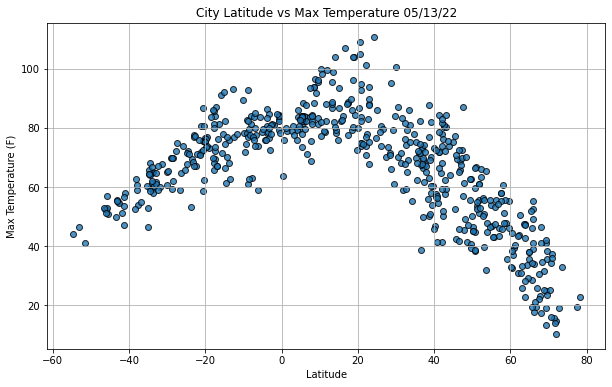

In [16]:
#import time
import time

#build scatter plot for lat vs max temp
plt.subplots(figsize=(10, 6))
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="cities")
#graph props
plt.title(f"City Latitude vs Max Temperature "  + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("weather_data/Fig1.png")

#show it
plt.show()

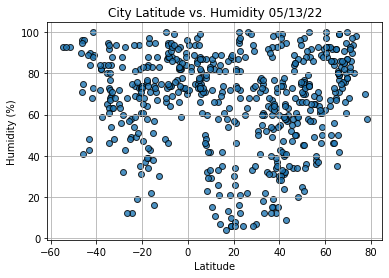

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

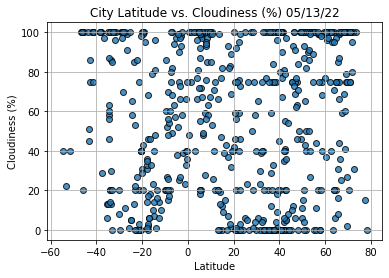

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

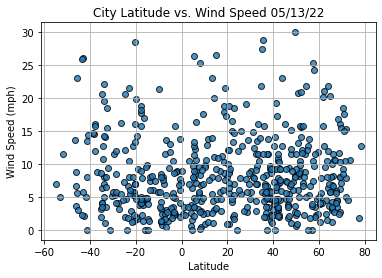

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
print(index13)

City                        Nador
Country                        MA
Date          2022-05-13 16:42:29
Lat                        35.174
Lng                       -2.9287
Max Temp                    75.27
Humidity                       64
Cloudiness                     20
Wind Speed                   5.75
Name: 13, dtype: object


In [30]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
550     True
551     True
552     True
553     True
554     True
Name: Lat, Length: 555, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2022-05-13 16:42:21,20.9310,-17.0347,73.98,56,92,18.75
5,Hilo,US,2022-05-13 16:42:24,19.7297,-155.0900,72.63,87,40,8.05
6,Goderich,CA,2022-05-13 16:42:24,43.7501,-81.7165,73.72,60,8,12.66
7,Bonavista,CA,2022-05-13 16:42:25,48.6499,-53.1147,41.45,66,50,7.27
8,Tasiilaq,GL,2022-05-13 16:42:26,65.6145,-37.6368,28.56,50,31,1.19


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

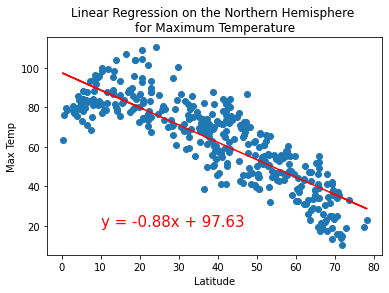

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,20))

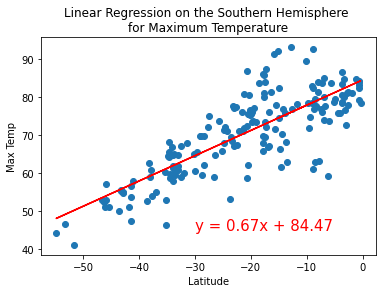

In [42]:
# Linear regression on the southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-30,45))

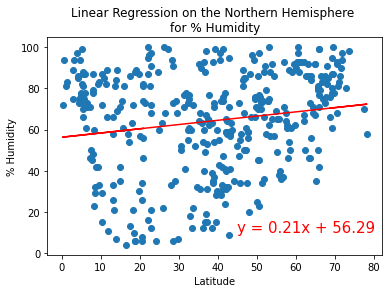

In [48]:
# Linear regression on the Northern Hemisphere humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(45,10))

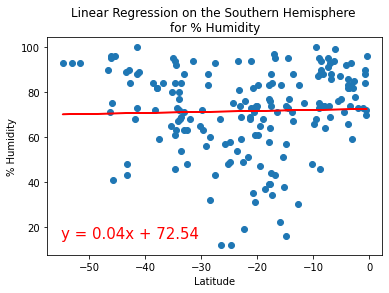

In [47]:
# Linear regression on the Southern Hemisphere humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,15))

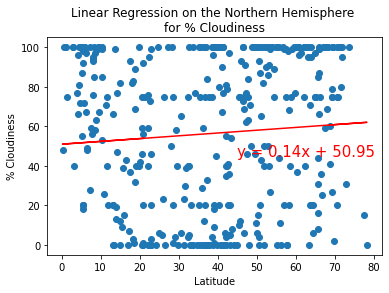

In [55]:
#r regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(45,45))# Linea

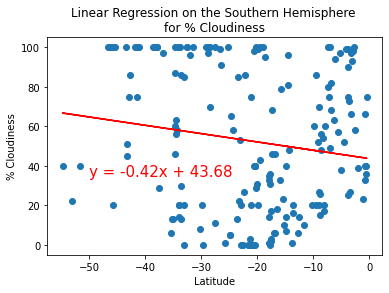

In [62]:
#r regression on the southern Hemispherer regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,35))

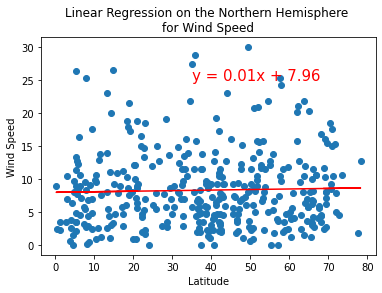

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(35,25))

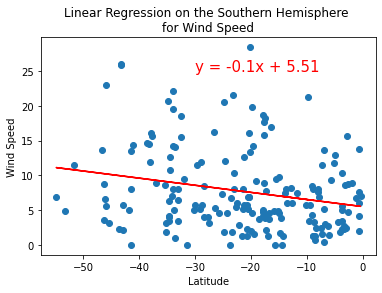

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-30,25))